In [ ]:
import re
from tqdm.notebook import tqdm

# Importing Libraries

In [ ]:
import numpy as numpy
import pandas as pd
from sklearn.metrics import classification_report as clf
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import pandas as pd

To visualize the data in the project

In [ ]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [ ]:
import sklearn
from sklearn.utils import shuffle 
from sklearn.feature_extraction.text import TfidfVectorizer

NLP Preprocessing libraries

In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [ ]:
import re
import random
import gensim

In [ ]:
from collections import Counter
import unicodedata as udata
import string

checking the versions 

In [ ]:
print(sklearn.__version__)
print(matplotlib.__version__)
print(numpy.__version__)
print(pd.__version__)
print(nltk.__version__)

0.22.2.post1
3.2.2
1.19.5
1.1.5
3.2.5


#File read

In [ ]:
import gdown
gdown.download('https://drive.google.com/uc?id=1iW8-Y9aePxyEhq1L7-_ldD9L-TzDd_Qb','Code_mixed_data.txt',quiet=True)

'Code_mixed_data.txt'

In [ ]:
fp = open("Code_mixed_data.txt", 'r')


comments = []
comments_label = []
for line in fp:
  lst = []
  lst = line.strip().split('\t')
  comments.append(lst[1])
  comments_label.append(lst[2])

# clean_data

In [ ]:
import re
from bs4 import BeautifulSoup
from nltk.tokenize import WordPunctTokenizer
tok = WordPunctTokenizer()

pat1 = r'@[A-Za-z0-9_]+'        # remove @ mentions from comments
pat2 = r'https?://[^ ]+'        # remove URLs from comments
combined_pat = r'|'.join((pat1, pat2)) #addition of pat1 and pat2
www_pat = r'www.[^ ]+'         # remove URLs from comments
negations_dic = {"isn't":"is not", "aren't":"are not", "wasn't":"was not", "weren't":"were not",   # converting words like isn't to is not
                "haven't":"have not","hasn't":"has not","hadn't":"had not","won't":"will not",
                "wouldn't":"would not", "don't":"do not", "doesn't":"does not","didn't":"did not",
                "can't":"can not","couldn't":"could not","shouldn't":"should not","mightn't":"might not",
                "mustn't":"must not"}
neg_pattern = re.compile(r'\b(' + '|'.join(negations_dic.keys()) + r')\b')

def tweet_cleaner(text):  
    soup = BeautifulSoup(text, 'lxml')    # create beautiful soup object
    souped = soup.get_text() 
    try:
        bom_removed = souped.decode("utf-8-sig").replace(u"\ufffd", "?")    # remove utf-8-sig code
    except:
        bom_removed = souped
    stripped = re.sub(combined_pat, '', bom_removed) # calling combined_pat
    stripped = re.sub(www_pat, '', stripped) #remove URL
    lower_case = stripped.lower()      # converting all into lower case
    neg_handled = neg_pattern.sub(lambda x: negations_dic[x.group()], lower_case) # converting words like isn't to is not
    letters_only = re.sub("[^a-zA-Z]", " ", neg_handled)       # will replace # by space
    words = [x for x  in tok.tokenize(letters_only) if len(x) > 1] # Word Punct Tokenize and only consider words whose length is greater than 1
    return (" ".join(words)).strip() # join the words

# Tokenizing comments

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

tokenize word in clean_tweet_texts and append it to word_tokens list

In [ ]:
word_tokens = [] # initialize list for tokens
for word in clean_tweet_texts:  # for each word in clean_tweet_texts
    word_tokens.append(word_tokenize(word)) #tokenize word in clean_tweet_texts and append it to word_tokens list

In [ ]:
word_tokens

# Lemmatizing

In [ ]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
df1 = [] # initialize list df1 to store words after lemmatization
from nltk.stem import WordNetLemmatizer # import WordNetLemmatizer from nltk.stem
lemmatizer = WordNetLemmatizer() # create an object of WordNetLemmatizer
for l in word_tokens: # for loop for every tokens in word_token
    b = [lemmatizer.lemmatize(q) for q in l] #for every tokens in word_token lemmatize word and giev it to b
    df1.append(b) #append b to list df1

In [ ]:
df1

In [ ]:
clean_df1 =[] # initialize list clean_df1 to join word tokens after lemmatization
for c in df1:  # for loop for each list in df1
    a = " ".join(c) # join words in list with space in between and give it to a
    clean_df1.append(a) # append a to clean_df1

#Train Test split

In [ ]:
from sklearn.model_selection  import train_test_split #from sklearn.cross_validation import train_test_split to split the data into training and tesing set
X_train, X_test, y_train, y_test = train_test_split(comments, comments_label, test_size = 0.20, random_state= 1) # split the data into traing and testing set where ratio is 80:20

In [ ]:
pip install flair

In [ ]:
from flair.data import Sentence

X_train_flair = [Sentence(comments) for comments in X_train]

In [ ]:
from flair.data import Sentence

X_test_flair = [Sentence(comments) for comments in X_test]

In [ ]:
X_test_flair

[Sentence: "rafu apko nhi bolna already wo dechyka hota h"   [− Tokens: 9],
 Sentence: "Handsom to hai mera bhai bhai he mera"   [− Tokens: 8],
 Sentence: "Baat kidhr hogi"   [− Tokens: 3],
 Sentence: "advanced eid mubarak"   [− Tokens: 3],
 Sentence: "Bhai shaadi b kroge ya randwe hi mroge"   [− Tokens: 8],
 Sentence: "Yr tum sab ko bahut takleef he bhai ki sadi . .. se . .. heiiiiinn ?"   [− Tokens: 17],
 Sentence: "modi ji apko sahi dimag ko me salute karta hu"   [− Tokens: 10],
 Sentence: "Hi bizy man ap hum sy kaha baat karo gy apko razan Mubarak hooo eid par SMG zaror karna plz plz bye"   [− Tokens: 22],
 Sentence: "Assalaam waalaikum bhaijaan ..."   [− Tokens: 4],
 Sentence: "Pagalo aa gae bus chalo ghus jao bus me jiyada aur rahy yaha to phir apka koi ilaj nhi"   [− Tokens: 19],
 Sentence: "5000comment in 5minute"   [− Tokens: 3],
 Sentence: "BAJRANGI BHAIJAAN 700 CRORE ! !"   [− Tokens: 6],
 Sentence: "Sir meri ek hi ichha h apse milna"   [− Tokens: 8],
 Sentence: "Mjh say bat

#Bert Embedding for input sentences

In [ ]:
from flair.embeddings import BertEmbeddings
import numpy as np
#embedding_bert = BertEmbeddings("bert-base-cased")
embedding_bert = BertEmbeddings("bert-base-cased")

X_train_bert = []
for sent in X_train_flair:
  sent_emb = np.array(embedding_bert.embed(sent)[0])
  emb = []
  for token in sent_emb:
    emb.append(np.array(token.embedding.cpu()))
  X_train_bert.append(np.array(emb))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: Call to deprecated method __init__. (Use 'TransformerWordEmbeddings' for all transformer-based word embeddings) -- Deprecated since version 0.4.5.
  This is separate from the ipykernel package so we can avoid doing imports until


Downloading:   0%|          | 0.00/208k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/29.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/426k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/570 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/416M [00:00<?, ?B/s]

Some weights of the model checkpoint at bert-base-cased were not used when initializing BertModel: ['cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.bias', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [ ]:
EMBEDDINGS_SIZE = X_train_bert[0].shape[1]
EMBEDDINGS_SIZE

3072

In [ ]:
#del X_test_flair[629:630]

In [ ]:
#del y_test[629:630]

In [ ]:
X_test_bert = []
for sent in X_test_flair:
  sent_emb = np.array(embedding_bert.embed(sent)[0])
  emb = []
  for token in sent_emb:
    emb.append(np.array(token.embedding.cpu()))
  X_test_bert.append(np.array(emb))

In [ ]:
MAX_SEQ_LEN_train = max([len(tweet.split()) for tweet in X_train])
print(MAX_SEQ_LEN_train)

MAX_SEQ_LEN_test = max([len(tweet.split()) for tweet in X_test])
print(MAX_SEQ_LEN_test)

MAX_SEQ_LEN = min(MAX_SEQ_LEN_train, MAX_SEQ_LEN_test)
MAX_SEQ_LEN

49
48


48

In [ ]:
np.save('test_bert', X_test_bert)
np.save('train_bert',X_train_bert)

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


In [ ]:
#import numpy as np
#X_train_bert = np.load("train_bert.npy", allow_pickle=True)
#X_test_bert = np.load("test_bert.npy", allow_pickle=True)

In [ ]:
import torch
from torch.nn.utils.rnn import pad_sequence

emb_list = []
for i in X_train_bert:
  emb_list.append(torch.tensor(i[:48]))
X_train_bert_padded = pad_sequence(emb_list, batch_first=True)

emb_list = []
for i in X_test_bert:
  emb_list.append(torch.tensor(i[:MAX_SEQ_LEN]))
X_test_bert_padded = pad_sequence(emb_list, batch_first=True)

In [ ]:
y_dct = {'0':0, '1':1,'2':2}
print(y_train[:5])

for i, sentiment in enumerate(y_train):
  y_train[i] = y_dct[sentiment]

import numpy as np 
y_train = np.array(y_train)
print(y_train[:5])

from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder(handle_unknown='ignore')
enc.fit(y_train.reshape(-1, 1))
y_train = enc.transform(y_train.reshape(-1, 1)).toarray()

print(y_train[:5])

['2', '1', '1', '2', '0']
[2 1 1 2 0]
[[0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]]


In [ ]:
y_dct = {'0':0, '1':1,'2':2}
print(y_test[:5])

y_test_int = []
for i, sentiment in enumerate(y_test):
  y_test_int.append(y_dct[sentiment])

import numpy as np 
y_test_int = np.array(y_test_int)
print(y_test_int[:5])

from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder(handle_unknown='ignore')
enc.fit(y_test_int.reshape(-1, 1))
y_test= enc.transform(y_test_int.reshape(-1, 1)).toarray()

print(y_test[:5])

['0', '2', '1', '2', '0']
[0 2 1 2 0]
[[1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]]


#Bi LSTM

In [ ]:

!pip install keras_Self_attention
!pip install keras_tqdm

  Created wheel for keras-Self-attention: filename=keras_self_attention-0.50.0-py3-none-any.whl size=19414 sha256=7da0b788c0b903323dbfff370af3d31de9df43d1d63887c2caf95abbee84853e
  Stored in directory: /root/.cache/pip/wheels/92/7a/a3/231bef5803298e7ec1815215bc0613239cb1e9c03c57b13c14
Successfully built keras-Self-attention


In [ ]:
import pickle

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import GRU
from keras.layers import Bidirectional
from keras import optimizers
from keras.layers.recurrent import LSTM
import keras
from keras.layers import Dropout
from keras_self_attention import SeqSelfAttention
from keras_tqdm import TQDMNotebookCallback

In [ ]:
#------------------------------------MODELS------------------------------------------#
 
# Basic BiLSTM, no appends
model_Bi_LSTM_1 = Sequential()
model_Bi_LSTM_1.add(Bidirectional(LSTM(10, dropout=0.5, recurrent_dropout=0.5, return_sequences=True), 
                                  input_shape=(48, 3072), 
                                  merge_mode='concat'))
model_Bi_LSTM_1.add(Bidirectional(LSTM(10, dropout=0.5, recurrent_dropout=0.5), merge_mode='concat'))
model_Bi_LSTM_1.add(Dense(5, activation='softmax'))
model_Bi_LSTM_1.add(Dense(3, activation='softmax'))
model_Bi_LSTM_1.summary()
model_Bi_LSTM_1.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])
model_Bi_LSTM_1.fit(x=X_train_bert_padded.cpu().numpy(), 
                    y=y_train, 
                    validation_data=(X_test_bert_padded.cpu().numpy(), y_test),	
                    batch_size=128, 
                    epochs=10, 
                    shuffle=True)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional_2 (Bidirectio  (None, 48, 20)           246640    
 nal)                                                            
                                                                 
 bidirectional_3 (Bidirectio  (None, 20)               2480      
 nal)                                                            
                                                                 
 dense_2 (Dense)             (None, 5)                 105       
                                                                 
 dense_3 (Dense)             (None, 3)                 18        
                                                                 
Total params: 249,243
Trainable params: 249,243
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
25/25 [==============================

In [ ]:
#from keras.models import load_model
#model_Bi_LSTM_1.save('my_model_Bi_LSTM_1.h5')  # creates a HDF5 file 'my_model.h5'
#del model  # deletes the existing model
# returns a compiled model
# identical to the previous one
#model_Bi_LSTM_1 = load_model('my_model_Bi_LSTM_1.h5')


In [ ]:
model_Bi_LSTM_1.evaluate(X_test_bert_padded.cpu().numpy(), y_test)[1]

25/25 [==============================] - 3s 109ms/step - loss: 0.8747 - accuracy: 0.6206


0.6206451654434204

In [ ]:
y_pred = []          

for tweet in X_test_bert_padded.cpu().numpy():
  y_pred.append(model_Bi_LSTM_1.predict(np.array([tweet])))

#y_pred = np.array([i[0] for i in y_pred])

In [ ]:
y_list= list(y_pred)

In [ ]:
def maximum(a, b, c):
    if (a >= b) and (a >= c):
        largest = 0
    elif (b >= a) and (b >= c):
        largest = 1
    else:
        largest = 2
    return largest

In [ ]:
y_pred_int =[]
for i in range(len(y_list)):
  y_pred_int.append(maximum((list(list(y_list[i]))[0][0]),(list(list(y_list[i]))[0][1]),(list(list(y_list[i]))[0][2])))


In [ ]:
y_pred = np.array(y_pred_int)

In [ ]:
target_names=['negative','neutral','positive']

In [ ]:
df_cm = pd.DataFrame(confusion_matrix(y_test_int, y_pred), columns=target_names, index=target_names)
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
print(df_cm)
print("\n")
print("Accuracy: ",accuracy_score(y_test_int, y_pred))
print("\n","Report:")
print(clf(y_test_int, y_pred, target_names=target_names))

Predicted  negative  neutral  positive
Actual                                
negative         59       46        14
neutral          46      283        56
positive         39       93       139


Accuracy:  0.6206451612903225

 Report:
              precision    recall  f1-score   support

    negative       0.41      0.50      0.45       119
     neutral       0.67      0.74      0.70       385
    positive       0.67      0.51      0.58       271

    accuracy                           0.62       775
   macro avg       0.58      0.58      0.58       775
weighted avg       0.63      0.62      0.62       775



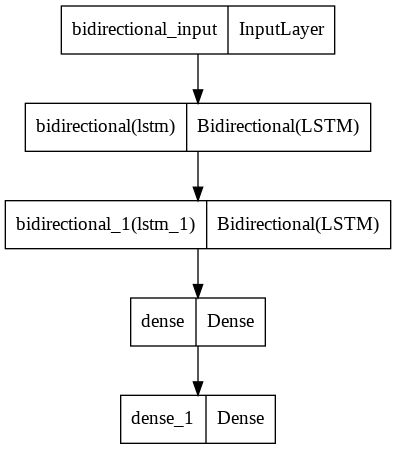

In [ ]:
tf.keras.utils.plot_model(
    model_Bi_LSTM_1,
    to_file="model.png"
)

#Bi LSTM with Self attention

In [ ]:
# BiLSTM with Attention

model_Bi_LSTM_att1 = Sequential()
model_Bi_LSTM_att1.add(Bidirectional(LSTM(10, dropout=0.5, recurrent_dropout=0.5, return_sequences=True), input_shape=(48, 3072), merge_mode='concat'))
model_Bi_LSTM_att1.add(SeqSelfAttention(attention_activation='sigmoid'))
model_Bi_LSTM_att1.add(Bidirectional(LSTM(5, dropout=0.5, recurrent_dropout=0.5), merge_mode='concat'))
#model_Bi_LSTM_att1.add(Dense(5, activation='softmax'))
model_Bi_LSTM_att1.add(Dense(3, activation='softmax'))
model_Bi_LSTM_att1.summary()
model_Bi_LSTM_att1.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])
model_Bi_LSTM_att1.fit(x=X_train_bert_padded.cpu().numpy(), 
                       y=y_train, 
                       validation_data=(X_test_bert_padded.cpu().numpy(), y_test),	
                       batch_size=64, 
                       epochs=10, 
                       shuffle=True)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional_4 (Bidirectio  (None, 48, 20)           246640    
 nal)                                                            
                                                                 
 seq_self_attention (SeqSelf  (None, 48, 20)           1345      
 Attention)                                                      
                                                                 
 bidirectional_5 (Bidirectio  (None, 10)               1040      
 nal)                                                            
                                                                 
 dense_4 (Dense)             (None, 3)                 33        
                                                                 
Total params: 249,058
Trainable params: 249,058
Non-trainable params: 0
________________________________________________

In [ ]:
#from keras.models import load_model
#model_Bi_LSTM_att1.save('my_model_Bi_LSTM_att1.h5')  # creates a HDF5 file 'my_model.h5'
#del model  # deletes the existing model
# returns a compiled model
# identical to the previous one
#model_Bi_LSTM_att1 = load_model('my_model_Bi_LSTM_att1.h5')


In [ ]:
model_Bi_LSTM_att1.evaluate(X_test_bert_padded.cpu().numpy(), y_test)[1]

25/25 [==============================] - 3s 114ms/step - loss: 0.9036 - accuracy: 0.6400


0.6399999856948853

In [ ]:
y_pred = []          

for tweet in X_test_bert_padded.cpu().numpy():
  y_pred.append(model_Bi_LSTM_att1.predict(np.array([tweet])))

#y_pred = np.array([i[0] for i in y_pred])

In [ ]:
y_list= list(y_pred)

In [ ]:
y_pred_int =[]
for i in range(len(y_list)):
  y_pred_int.append(maximum((list(list(y_list[i]))[0][0]),(list(list(y_list[i]))[0][1]),(list(list(y_list[i]))[0][2])))


In [ ]:
y_pred_int = np.array(y_pred_int)

In [ ]:
df_cm = pd.DataFrame(confusion_matrix(y_test_int, y_pred_int), columns=target_names, index=target_names)
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
print(df_cm)
print("\n")
print("Accuracy: ",accuracy_score(y_test_int, y_pred_int))
print("\n","Report:")
print(clf(y_test_int, y_pred_int, target_names=target_names))

Predicted  negative  neutral  positive
Actual                                
negative         40       64        15
neutral          18      336        31
positive         23      128       120


Accuracy:  0.64

 Report:
              precision    recall  f1-score   support

    negative       0.49      0.34      0.40       119
     neutral       0.64      0.87      0.74       385
    positive       0.72      0.44      0.55       271

    accuracy                           0.64       775
   macro avg       0.62      0.55      0.56       775
weighted avg       0.64      0.64      0.62       775



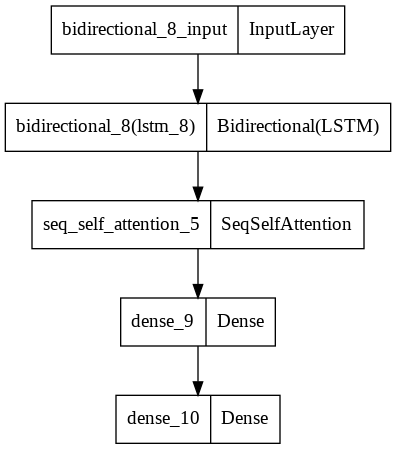

In [ ]:
tf.keras.utils.plot_model(
    model_Bi_LSTM_att1,
    to_file="model.png"
)

#BiLSTM with Self Attention and GRU

In [ ]:
# BiLSTM with Attention adn GRU

from keras.layers import GRU

model_GRU = Sequential()
model_GRU.add(Bidirectional(LSTM(10, dropout=0.5, recurrent_dropout=0.5, return_sequences=True), input_shape=(48, 3072), merge_mode='concat'))
#model_GRU.add(GRU(8, dropout=0.5, recurrent_dropout=0.5, return_sequences=True))
model_GRU.add(SeqSelfAttention(attention_activation='sigmoid'))
model_GRU.add(GRU(8, dropout=0.5, recurrent_dropout=0.5, return_sequences=False))
#model_GRU.add(Dense(8, activation='softmax'))
model_GRU.add(Dense(3, activation='softmax'))
model_GRU.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])
model_GRU.fit(x=X_train_bert_padded.cpu().numpy(), 
              y=y_train, 
              validation_data=(X_test_bert_padded.cpu().numpy(), y_test),	
              batch_size=64, epochs=10, shuffle=True)

Epoch 1/10
49/49 [==============================] - 74s 1s/step - loss: 1.0217 - accuracy: 0.5056 - val_loss: 0.9781 - val_accuracy: 0.5523
Epoch 2/10
49/49 [==============================] - 63s 1s/step - loss: 0.9624 - accuracy: 0.5501 - val_loss: 0.9510 - val_accuracy: 0.5613
Epoch 3/10
49/49 [==============================] - 63s 1s/step - loss: 0.9180 - accuracy: 0.5885 - val_loss: 0.9060 - val_accuracy: 0.5961
Epoch 4/10
49/49 [==============================] - 63s 1s/step - loss: 0.8749 - accuracy: 0.6046 - val_loss: 0.9068 - val_accuracy: 0.5948
Epoch 5/10
49/49 [==============================] - 63s 1s/step - loss: 0.8335 - accuracy: 0.6287 - val_loss: 0.8597 - val_accuracy: 0.6052
Epoch 6/10
49/49 [==============================] - 63s 1s/step - loss: 0.7989 - accuracy: 0.6423 - val_loss: 0.8520 - val_accuracy: 0.6181
Epoch 7/10
49/49 [==============================] - 63s 1s/step - loss: 0.7646 - accuracy: 0.6607 - val_loss: 0.8459 - val_accuracy: 0.6232
Epoch 8/10
49/49 [==

In [ ]:
model_GRU.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional_6 (Bidirectio  (None, 48, 20)           246640    
 nal)                                                            
                                                                 
 seq_self_attention_1 (SeqSe  (None, 48, 20)           1345      
 lfAttention)                                                    
                                                                 
 gru (GRU)                   (None, 8)                 720       
                                                                 
 dense_5 (Dense)             (None, 3)                 27        
                                                                 
Total params: 248,732
Trainable params: 248,732
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model_GRU.evaluate(X_test_bert_padded.cpu().numpy(), y_test)[1]

25/25 [==============================] - 3s 111ms/step - loss: 0.8597 - accuracy: 0.6361


0.6361290216445923

In [ ]:
#from keras.models import load_model
#model_GRU.save('my_model_GRU.h5')  # creates a HDF5 file 'my_model.h5'
#del model  # deletes the existing model
# returns a compiled model
# identical to the previous one
#model_GRU = load_model('my_model_GRU.h5')


In [ ]:
y_pred = []          

for tweet in X_test_bert_padded.cpu().numpy():
  y_pred.append(model_GRU.predict(np.array([tweet])))

#y_pred = np.array([i[0] for i in y_pred])

In [ ]:
y_list= list(y_pred)

In [ ]:
y_pred_int =[]
for i in range(len(y_list)):
  y_pred_int.append(maximum((list(list(y_list[i]))[0][0]),(list(list(y_list[i]))[0][1]),(list(list(y_list[i]))[0][2])))


In [ ]:
y_pred = np.array(y_pred_int)

In [ ]:
df_cm = pd.DataFrame(confusion_matrix(y_test_int, y_pred), columns=target_names, index=target_names)
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
print(df_cm)
print("\n")
print("Accuracy: ",accuracy_score(y_test_int, y_pred))
print("\n","Report:")
print(clf(y_test_int, y_pred, target_names=target_names))

Predicted  negative  neutral  positive
Actual                                
negative         36       64        19
neutral          18      319        48
positive         17      116       138


Accuracy:  0.6361290322580645

 Report:
              precision    recall  f1-score   support

    negative       0.51      0.30      0.38       119
     neutral       0.64      0.83      0.72       385
    positive       0.67      0.51      0.58       271

    accuracy                           0.64       775
   macro avg       0.61      0.55      0.56       775
weighted avg       0.63      0.64      0.62       775



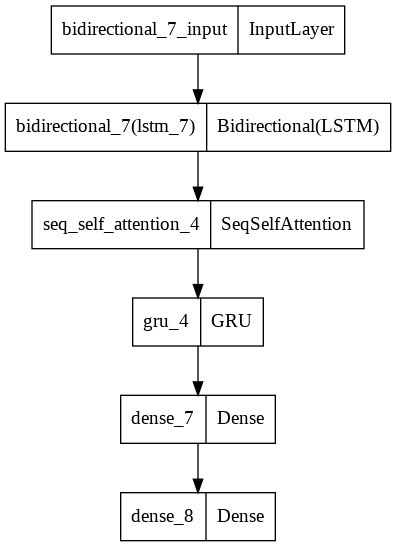

In [ ]:
tf.keras.utils.plot_model(
    model_GRU,
    to_file="model.png"
)

#Accuracy Comparison

In [ ]:
data_dict1 = {'Basic BiLSTM':0.62, 'BiLSTM+Attention':0.64, 'BiLSTM+Attention+GRU':0.64}

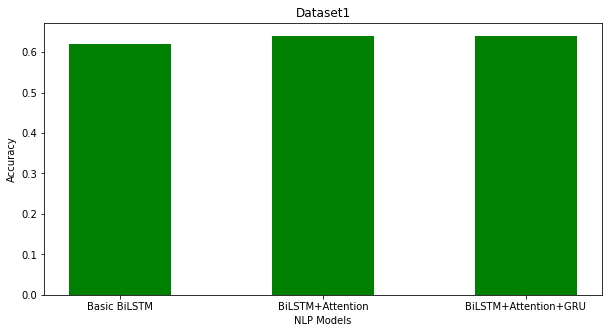

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
# Dataset generation

courses = list(data_dict1.keys())
values = list(data_dict1.values())
fig = plt.figure(figsize = (10, 5))
#  Bar plot
plt.bar(courses, values, color ='green',
        width = 0.5)
plt.xlabel("NLP Models")
plt.ylabel("Accuracy")
plt.title("Dataset1")
plt.show()

#Another New Dataset

In [ ]:
df = pd.read_csv('/content/sample_data/processed_comments_2 (1).csv')

In [ ]:
slist = df.sentence.values.tolist()

In [ ]:
slist_label = df.sentiment.values.tolist()

In [ ]:
from sklearn.model_selection  import train_test_split #from sklearn.cross_validation import train_test_split to split the data into training and tesing set
X_train, X_test, y_train, y_test = train_test_split(slist2, slist_label2, test_size = 0.20,stratify = slist_label2) # split the data into traing and testing set where ratio is 80:20

In [ ]:
(unique, counts) = np.unique(y_train, return_counts=True)
frequencies = np.asarray((unique, counts)).T
frequencies

array([['negative', '919'],
       ['neutral', '1250'],
       ['positive', '1031']], dtype='<U21')

In [ ]:
from flair.data import Sentence

X_train_flair = [Sentence(comments) for comments in X_train]

In [ ]:
X_test_flair = [Sentence(comments) for comments in X_test]

In [ ]:
from flair.embeddings import BertEmbeddings
import numpy as np

In [ ]:
embedding_bert = BertEmbeddings("bert-base-multilingual-cased")

In [ ]:
X_train_bert = []
for sent in X_train_flair:
  sent_emb = np.array(embedding_bert.embed(sent)[0])
  emb = []
  for token in sent_emb:
    emb.append(np.array(token.embedding.cpu()))
  X_train_bert.append(np.array(emb))

In [ ]:
EMBEDDINGS_SIZE = X_train_bert[0].shape[1]
EMBEDDINGS_SIZE

3072

In [ ]:
X_test_bert = []
for sent in X_test_flair:
  sent_emb = np.array(embedding_bert.embed(sent)[0])
  emb = []
  for token in sent_emb:
    emb.append(np.array(token.embedding.cpu()))
  X_test_bert.append(np.array(emb))

In [ ]:
MAX_SEQ_LEN_train = max([len(tweet.split()) for tweet in X_train])
print(MAX_SEQ_LEN_train)

MAX_SEQ_LEN_test = max([len(tweet.split()) for tweet in X_test])
print(MAX_SEQ_LEN_test)

MAX_SEQ_LEN = min(MAX_SEQ_LEN_train, MAX_SEQ_LEN_test)
MAX_SEQ_LEN

68
60


60

In [ ]:
np.save('test_bert', X_test_bert)
np.save('train_bert',X_train_bert)

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


In [ ]:
#import numpy as np
#X_train_bert = np.load("train_bert.npy", allow_pickle=True)
#X_test_bert = np.load("test_bert.npy", allow_pickle=True)

In [ ]:
import torch
from torch.nn.utils.rnn import pad_sequence

emb_list = []
for i in X_train_bert:
  emb_list.append(torch.tensor(i[:MAX_SEQ_LEN]))
X_train_bert_padded = pad_sequence(emb_list, batch_first=True)

emb_list = []
for i in X_test_bert:
  emb_list.append(torch.tensor(i[:MAX_SEQ_LEN]))
X_test_bert_padded = pad_sequence(emb_list, batch_first=True)

In [ ]:
#y_dct = {'0':0, '1':1,'2':2}
#print(y_train[:5])

#for i, sentiment in enumerate(y_train):
#  y_train[i] = y_dct[sentiment]

import numpy as np 
y_train = np.array(y_train)
print(y_train[:5])

from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder(handle_unknown='ignore')
enc.fit(y_train.reshape(-1, 1))
y_train = enc.transform(y_train.reshape(-1, 1)).toarray()

print(y_train[:5])

['positive' 'negative' 'positive' 'positive' 'positive']
[[0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]]


In [ ]:
#y_dct = {'0':0, '1':1,'2':2}
#print(y_test[:5])

#y_test_int = []
#for i, sentiment in enumerate(y_test):
#  y_test_int.append(y_dct[sentiment])

import numpy as np 
y_test_int = np.array(y_test)
print(y_test_int[:5])

from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder(handle_unknown='ignore')
enc.fit(y_test_int.reshape(-1, 1))
y_test= enc.transform(y_test_int.reshape(-1, 1)).toarray()

print(y_test[:5])

['neutral' 'positive' 'neutral' 'positive' 'negative']
[[0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]]


#BiLSTM

In [ ]:
#------------------------------------MODELS------------------------------------------#
 
"""#### Basic BiLSTM, no appends
**MODEL 1.0**:
*   2 LSTM layer
*   4 dense
*   2 dense
"""

model_Bi_LSTM_1 = Sequential()
model_Bi_LSTM_1.add(Bidirectional(LSTM(10, dropout=0.5, recurrent_dropout=0.5, return_sequences=True), 
                                  input_shape=(60, 3072), 
                                  merge_mode='concat'))
model_Bi_LSTM_1.add(Bidirectional(LSTM(10, dropout=0.5, recurrent_dropout=0.5), merge_mode='concat'))
model_Bi_LSTM_1.add(Dense(5, activation='softmax'))
model_Bi_LSTM_1.add(Dense(3, activation='softmax'))
model_Bi_LSTM_1.summary()
model_Bi_LSTM_1.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])
model_Bi_LSTM_1.fit(x=X_train_bert_padded.cpu().numpy(), 
                    y=y_train, 
                    validation_data=(X_test_bert_padded.cpu().numpy(), y_test),	
                    batch_size=128, 
                    epochs=10, 
                    shuffle=True)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional_2 (Bidirectio  (None, 60, 20)           246640    
 nal)                                                            
                                                                 
 bidirectional_3 (Bidirectio  (None, 20)               2480      
 nal)                                                            
                                                                 
 dense_2 (Dense)             (None, 5)                 105       
                                                                 
 dense_3 (Dense)             (None, 3)                 18        
                                                                 
Total params: 249,243
Trainable params: 249,243
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
25/25 [==============================

In [ ]:
model_Bi_LSTM_1.fit(x=X_train_bert_padded.cpu().numpy(), 
                    y=y_train, 
                    validation_data=(X_test_bert_padded.cpu().numpy(), y_test),	
                    batch_size=128, 
                    epochs=10, 
                    shuffle=True)

Epoch 1/10
25/25 [==============================] - 74s 3s/step - loss: 0.9288 - accuracy: 0.5584 - val_loss: 0.9452 - val_accuracy: 0.5312
Epoch 2/10
25/25 [==============================] - 74s 3s/step - loss: 0.9225 - accuracy: 0.5441 - val_loss: 0.9443 - val_accuracy: 0.5088
Epoch 3/10
25/25 [==============================] - 74s 3s/step - loss: 0.9182 - accuracy: 0.5416 - val_loss: 0.9401 - val_accuracy: 0.5263
Epoch 4/10
25/25 [==============================] - 73s 3s/step - loss: 0.9055 - accuracy: 0.5612 - val_loss: 0.9433 - val_accuracy: 0.5138
Epoch 5/10
25/25 [==============================] - 73s 3s/step - loss: 0.9084 - accuracy: 0.5469 - val_loss: 0.9438 - val_accuracy: 0.5088
Epoch 6/10
25/25 [==============================] - 74s 3s/step - loss: 0.8968 - accuracy: 0.5716 - val_loss: 0.9536 - val_accuracy: 0.5025
Epoch 7/10
25/25 [==============================] - 74s 3s/step - loss: 0.8826 - accuracy: 0.5706 - val_loss: 0.9296 - val_accuracy: 0.5362
Epoch 8/10
25/25 [==

In [ ]:
model_Bi_LSTM_1.evaluate(X_test_bert_padded.cpu().numpy(), y_test)

25/25 [==============================] - 5s 138ms/step - loss: 0.9268 - accuracy: 0.5150


[0.926770806312561, 0.5149999856948853]

In [ ]:
y_pred = []          

for tweet in X_test_bert_padded.cpu().numpy():
  y_pred.append(model_Bi_LSTM_1.predict(np.array([tweet])))

#y_pred = np.array([i[0] for i in y_pred])

In [ ]:
y_list= list(y_pred)

In [ ]:
y_pred = np.array(y_pred_int)

In [ ]:
y_dct = {'negative':0,'neutral':1,'positive':2}
#print(y_train[:5])
y_test_2 = []
for sentiment in y_test_int:
  y_test_2.append(y_dct[sentiment])

In [ ]:
target_names=['negative','neutral','positive']

df_cm = pd.DataFrame(confusion_matrix(y_test_2, y_pred), columns=target_names, index=target_names)
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
print(df_cm)
print("\n")
print("Accuracy: ",accuracy_score(y_test_2, y_pred))
print("\n","Report:")
print(clf(y_test_2, y_pred, target_names=target_names))

Predicted  negative  neutral  positive
Actual                                
negative        181       30        19
neutral         159       47       106
positive         48       26       184


Accuracy:  0.515

 Report:
              precision    recall  f1-score   support

    negative       0.47      0.79      0.59       230
     neutral       0.46      0.15      0.23       312
    positive       0.60      0.71      0.65       258

    accuracy                           0.52       800
   macro avg       0.51      0.55      0.49       800
weighted avg       0.50      0.52      0.47       800



#Bi LSTM with Self attention

In [ ]:
"""
#### Self Attention Library, no appends
**MODEL 2.0 SelfAtt**
"""

model_Bi_LSTM_att1 = Sequential()
model_Bi_LSTM_att1.add(Bidirectional(LSTM(10, dropout=0.5, recurrent_dropout=0.5, return_sequences=True), input_shape=(60, 3072), merge_mode='concat'))
model_Bi_LSTM_att1.add(SeqSelfAttention(attention_activation='sigmoid'))
model_Bi_LSTM_att1.add(Bidirectional(LSTM(5, dropout=0.5, recurrent_dropout=0.5), merge_mode='concat'))
#model_Bi_LSTM_att1.add(Dense(5, activation='softmax'))
model_Bi_LSTM_att1.add(Dense(3, activation='softmax'))
model_Bi_LSTM_att1.summary()
model_Bi_LSTM_att1.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])
model_Bi_LSTM_att1.fit(x=X_train_bert_padded.cpu().numpy(), 
                       y=y_train, 
                       validation_data=(X_test_bert_padded.cpu().numpy(), y_test),	
                       batch_size=64, 
                       epochs=10, 
                       shuffle=True)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional_6 (Bidirectio  (None, 60, 20)           246640    
 nal)                                                            
                                                                 
 seq_self_attention_1 (SeqSe  (None, 60, 20)           1345      
 lfAttention)                                                    
                                                                 
 bidirectional_7 (Bidirectio  (None, 10)               1040      
 nal)                                                            
                                                                 
 dense_5 (Dense)             (None, 3)                 33        
                                                                 
Total params: 249,058
Trainable params: 249,058
Non-trainable params: 0
________________________________________________

In [ ]:
model_Bi_LSTM_att1.evaluate(X_test_bert_padded.cpu().numpy(), y_test)[1]

25/25 [==============================] - 5s 142ms/step - loss: 0.9157 - accuracy: 0.5512


0.5512499809265137

In [ ]:
y_pred = []          

for tweet in X_test_bert_padded.cpu().numpy():
  y_pred.append(model_Bi_LSTM_att1.predict(np.array([tweet])))


In [ ]:
y_list= list(y_pred)

In [ ]:
target_names=['negative','neutral','positive']

df_cm = pd.DataFrame(confusion_matrix(y_test_2, y_pred_int), columns=target_names, index=target_names)
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
print(df_cm)
print("\n")
print("Accuracy: ",accuracy_score(y_test_2, y_pred_int))
print("\n","Report:")
print(clf(y_test_2, y_pred_int, target_names=target_names))

Predicted  negative  neutral  positive
Actual                                
negative        114      108         8
neutral          72      185        55
positive         20       96       142


Accuracy:  0.55125

 Report:
              precision    recall  f1-score   support

    negative       0.55      0.50      0.52       230
     neutral       0.48      0.59      0.53       312
    positive       0.69      0.55      0.61       258

    accuracy                           0.55       800
   macro avg       0.57      0.55      0.55       800
weighted avg       0.57      0.55      0.55       800



#BiLSTM with Self Attention and GRU

In [ ]:
from keras.layers import GRU
model_GRU = Sequential()
model_GRU.add(Bidirectional(LSTM(10, dropout=0.5, recurrent_dropout=0.5, return_sequences=True), input_shape=(60, 3072), merge_mode='concat'))
#model_GRU.add(GRU(8, dropout=0.5, recurrent_dropout=0.5, return_sequences=True))
model_GRU.add(SeqSelfAttention(attention_activation='sigmoid'))
model_GRU.add(GRU(8, dropout=0.5, recurrent_dropout=0.5, return_sequences=False))
#model_GRU.add(Dense(8, activation='softmax'))
model_GRU.add(Dense(3, activation='softmax'))
model_GRU.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])
model_GRU.fit(x=X_train_bert_padded.cpu().numpy(), 
              y=y_train, 
              validation_data=(X_test_bert_padded.cpu().numpy(), y_test),	
              batch_size=64, epochs=10, shuffle=True)

Epoch 1/10
50/50 [==============================] - 87s 2s/step - loss: 1.0385 - accuracy: 0.4519 - val_loss: 0.9735 - val_accuracy: 0.4663
Epoch 2/10
50/50 [==============================] - 80s 2s/step - loss: 0.9896 - accuracy: 0.4881 - val_loss: 0.9416 - val_accuracy: 0.5312
Epoch 3/10
50/50 [==============================] - 80s 2s/step - loss: 0.9586 - accuracy: 0.5084 - val_loss: 0.9295 - val_accuracy: 0.5375
Epoch 4/10
50/50 [==============================] - 80s 2s/step - loss: 0.9396 - accuracy: 0.5462 - val_loss: 0.9236 - val_accuracy: 0.5238
Epoch 5/10
50/50 [==============================] - 80s 2s/step - loss: 0.9219 - accuracy: 0.5534 - val_loss: 0.9216 - val_accuracy: 0.5462
Epoch 6/10
50/50 [==============================] - 80s 2s/step - loss: 0.8974 - accuracy: 0.5728 - val_loss: 0.9118 - val_accuracy: 0.5512
Epoch 7/10
50/50 [==============================] - 81s 2s/step - loss: 0.8820 - accuracy: 0.5781 - val_loss: 0.9212 - val_accuracy: 0.5350
Epoch 8/10
50/50 [==

In [ ]:
model_GRU.fit(x=X_train_bert_padded.cpu().numpy(), 
              y=y_train, 
              validation_data=(X_test_bert_padded.cpu().numpy(), y_test),	
              batch_size=64, epochs=5, shuffle=True)

Epoch 1/5
50/50 [==============================] - 81s 2s/step - loss: 0.7900 - accuracy: 0.6478 - val_loss: 0.9475 - val_accuracy: 0.5437
Epoch 2/5
50/50 [==============================] - 81s 2s/step - loss: 0.7707 - accuracy: 0.6562 - val_loss: 0.9388 - val_accuracy: 0.5400
Epoch 3/5
50/50 [==============================] - 82s 2s/step - loss: 0.7564 - accuracy: 0.6619 - val_loss: 0.9706 - val_accuracy: 0.5337
Epoch 4/5
50/50 [==============================] - 81s 2s/step - loss: 0.7356 - accuracy: 0.6741 - val_loss: 0.9959 - val_accuracy: 0.5337
Epoch 5/5
50/50 [==============================] - 82s 2s/step - loss: 0.7022 - accuracy: 0.6950 - val_loss: 1.0004 - val_accuracy: 0.5450


In [ ]:
model_GRU.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional_6 (Bidirectio  (None, 48, 20)           246640    
 nal)                                                            
                                                                 
 seq_self_attention_1 (SeqSe  (None, 48, 20)           1345      
 lfAttention)                                                    
                                                                 
 gru (GRU)                   (None, 8)                 720       
                                                                 
 dense_5 (Dense)             (None, 3)                 27        
                                                                 
Total params: 248,732
Trainable params: 248,732
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model_GRU.evaluate(X_test_bert_padded.cpu().numpy(), y_test)[1]

25/25 [==============================] - 4s 138ms/step - loss: 1.0004 - accuracy: 0.5450


0.5450000166893005

In [ ]:
y_pred = []          

for tweet in X_test_bert_padded.cpu().numpy():
  y_pred.append(model_GRU.predict(np.array([tweet])))

#y_pred = np.array([i[0] for i in y_pred])

In [ ]:
y_list= list(y_pred)

In [ ]:
y_pred = np.array(y_pred_int)

In [ ]:
y_dct = {'negative':0,'neutral':1,'positive':2}
#print(y_train[:5])
y_test_2 = []
for sentiment in y_test_int:
  y_test_2.append(y_dct[sentiment])

In [ ]:
target_names=['negative','neutral','positive']

df_cm = pd.DataFrame(confusion_matrix(y_test_2, y_pred), columns=target_names, index=target_names)
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
print(df_cm)
print("\n")
print("Accuracy: ",accuracy_score(y_test_2, y_pred))
print("\n","Report:")
print(clf(y_test_2, y_pred, target_names=target_names))

Predicted  negative  neutral  positive
Actual                                
negative        153       68         9
neutral         110      142        60
positive         47       70       141


Accuracy:  0.545

 Report:
              precision    recall  f1-score   support

    negative       0.49      0.67      0.57       230
     neutral       0.51      0.46      0.48       312
    positive       0.67      0.55      0.60       258

    accuracy                           0.55       800
   macro avg       0.56      0.56      0.55       800
weighted avg       0.56      0.55      0.54       800



#Accuracy Comparison

In [ ]:
data_dict2 = {'Basic BiLSTM':0.51, 'BiLSTM+Attention':0.55, 'BiLSTM+Attention+GRU':0.55}

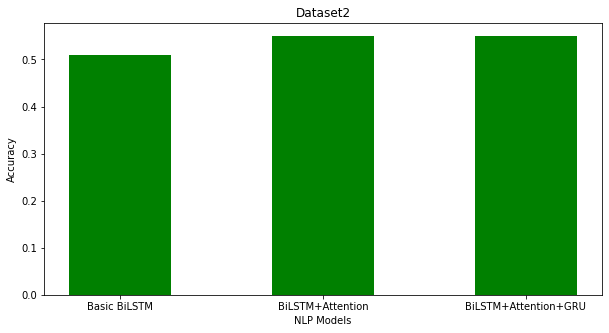

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
# Dataset generation

courses = list(data_dict2.keys())
values = list(data_dict2.values())
fig = plt.figure(figsize = (10, 5))
#  Bar plot
plt.bar(courses, values, color ='green',
        width = 0.5)
plt.xlabel("NLP Models")
plt.ylabel("Accuracy")
plt.title("Dataset2")
plt.show()